In [3]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
# Step 2: Load the dataset
data = pd.read_csv(r"matches.csv")

In [5]:
data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Step 3: Data Pre-Processing & Feature selection
# Data Cleaning and Filling Missing values
data = data.iloc[:, :-1]  # Remove the last column which seems unnecessary
data.dropna(inplace=True)
# Removing unwanted columns
data.drop(["id", "Season", "city", "date", "player_of_match", "venue", "umpire1", "umpire2"], axis=1, inplace=True)

# Transforming categorical variables into numerical variables
X = data.drop(["winner"], axis=1)
y = data["winner"]
X = pd.get_dummies(X, columns=["team1", "team2", "toss_winner", "toss_decision", "result"], drop_first=True)

# Label encoding the target variable
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

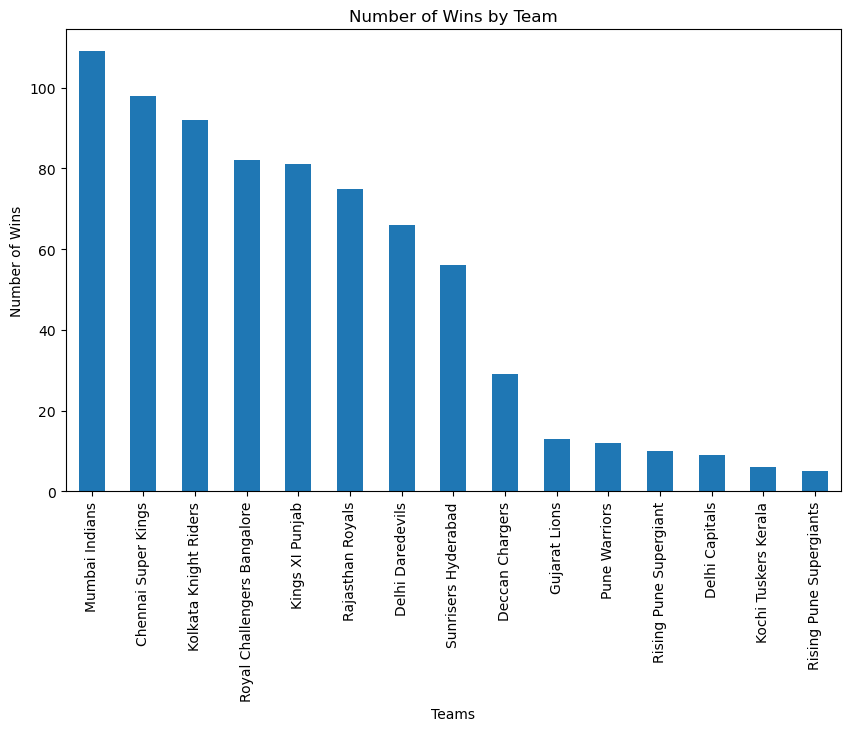

In [7]:
# Step 4: Data Visualization
# Bar Chart of winners
plt.figure(figsize=(10, 6))
data['winner'].value_counts().plot(kind='bar')
plt.title('Number of Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()

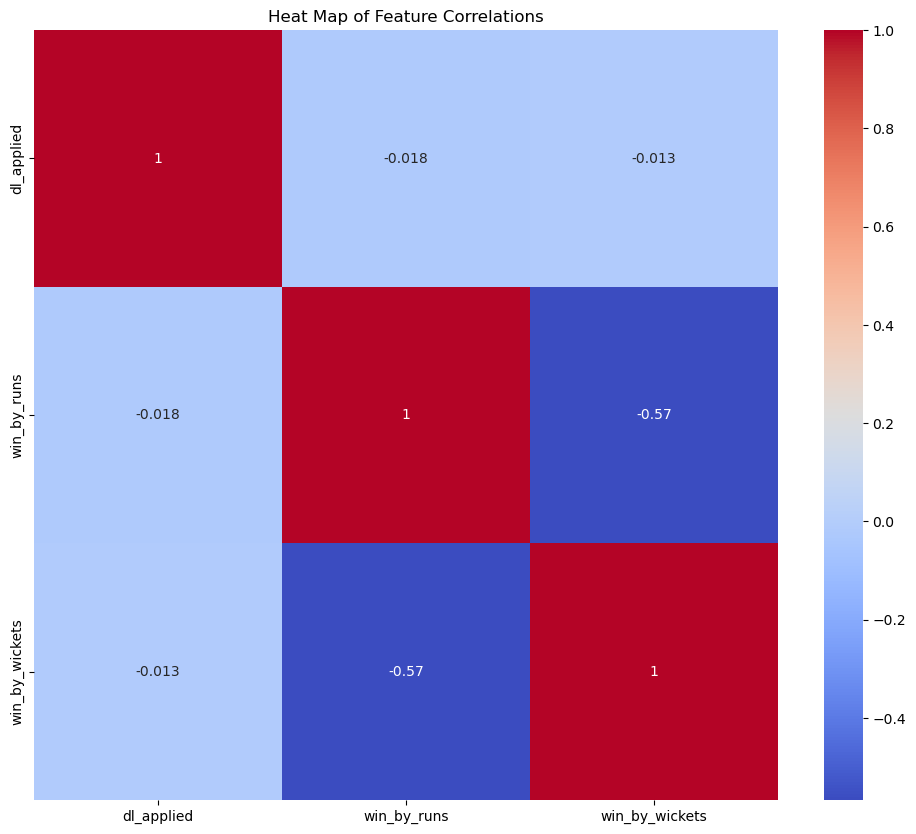

In [8]:
# Heat Map of correlations
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map of Feature Correlations')
plt.show()

In [9]:
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
data['toss_winner']=data['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['toss_winner']=data['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team1']=data['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['team2']=data['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['winner']=data['winner'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['toss_winner']=data['toss_winner'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
data['team1']=data['team1'].str.replace('Kings XI Punjab','Punjab Kings')
data['team2']=data['team2'].str.replace('Kings XI Punjab','Punjab Kings')
data['winner']=data['winner'].str.replace('Kings XI Punjab','Punjab Kings')
data['toss_winner']=data['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')

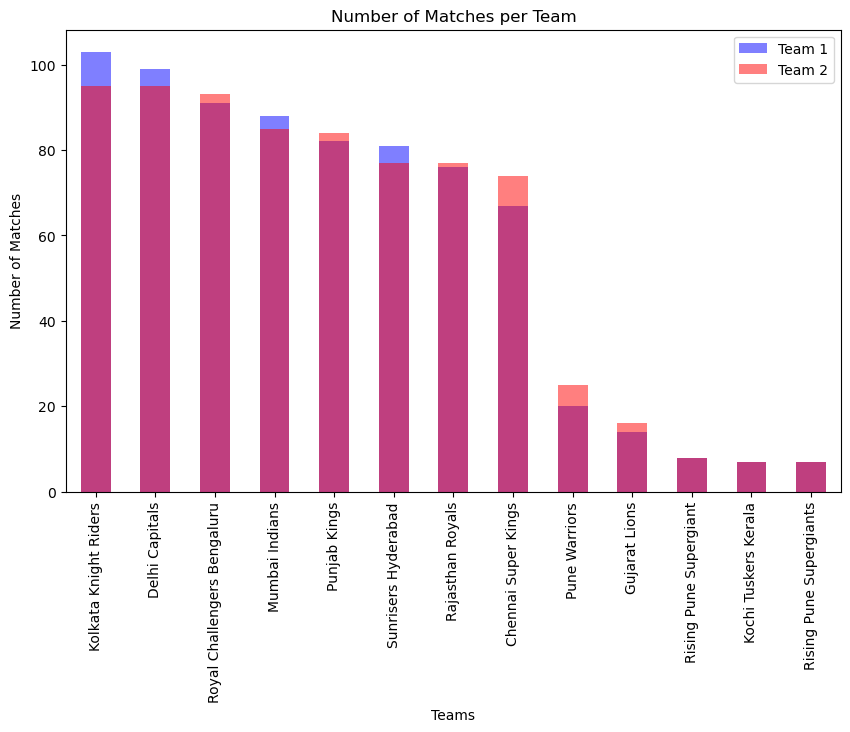

In [10]:
# Histogram of the number of matches per team
plt.figure(figsize=(10, 6))
data['team1'].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Team 1')
data['team2'].value_counts().plot(kind='bar', alpha=0.5, color='red', label='Team 2')
plt.title('Number of Matches per Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.legend()
plt.show()

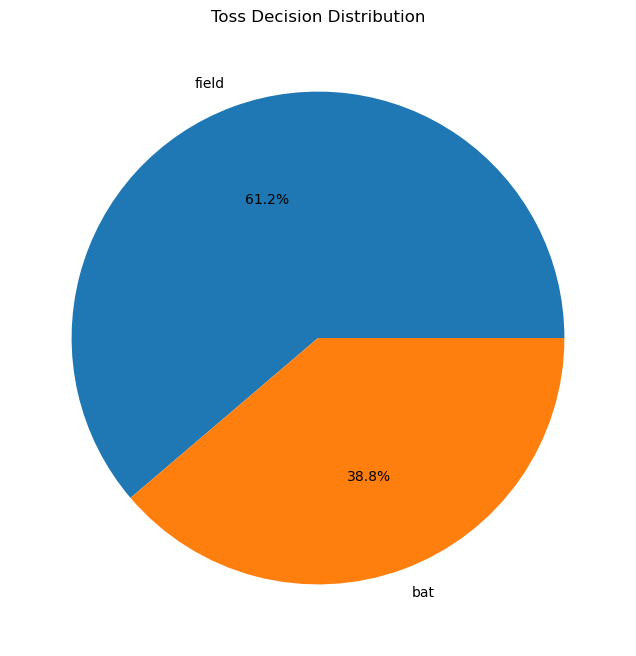

In [11]:
# Pie Chart of toss decisions
plt.figure(figsize=(8, 8))
data['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.show()

In [12]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


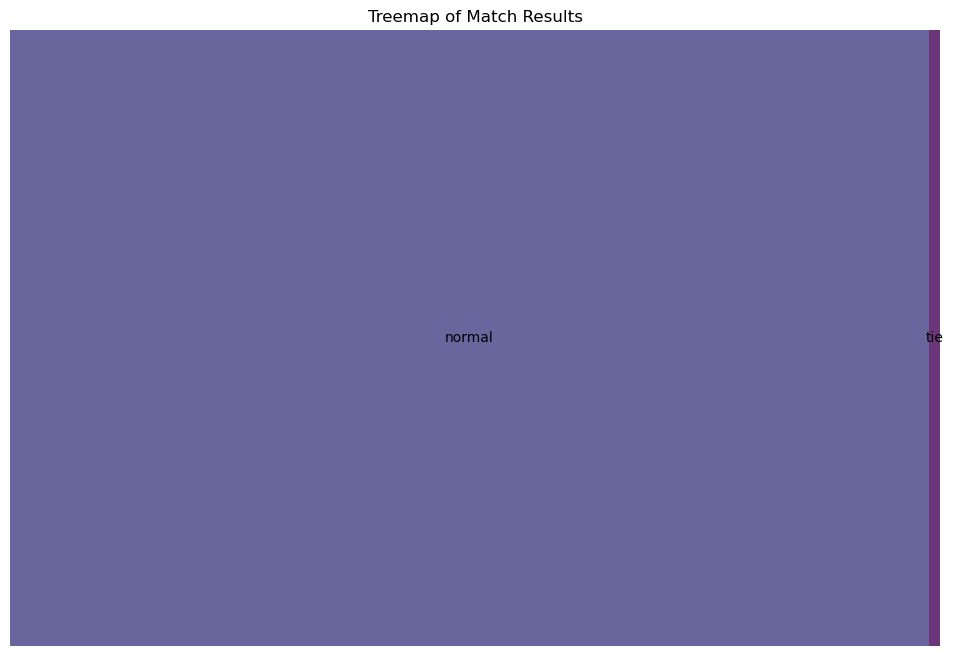

In [13]:
# Treemap of match results
import squarify
plt.figure(figsize=(12, 8))
result_counts = data['result'].value_counts()
squarify.plot(sizes=result_counts, label=result_counts.index, alpha=0.8)
plt.title('Treemap of Match Results')
plt.axis('off')
plt.show()

In [14]:
# Step 5: Splitting and Training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Step 6: Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Step 7: Load and Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Step 8: Evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


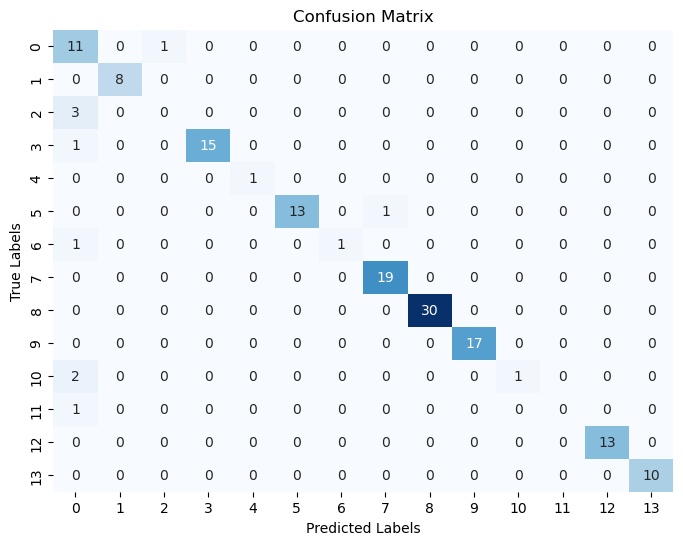

In [18]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

Accuracy of the model: 93.29%
